In [3]:
# supress package import warnings
import warnings
warnings.filterwarnings('ignore')

# Part One - Procedure

Movement and volatility of a major cryptocurrency, Binance coin (BNB-USD)

Import necessary libraries for Option pricing analysis

Yfinance package -->  download the financial time series data for "bnb token bnb-USD".<br>
Numpy -->  mathematical operations which are needed in designing a price derivative of a stock.<br>
Pandas -->  data frames and data analysis. <br>
Matplotlib -->  Ploting the graphs.<br>
OS module --> Helps with OS operations such as creating and removing a directory, fetching its contents, print with string<br>

In [4]:
#Import required libaries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as si

Download bnb token bnb-USD trading  data from Yahoo Finance from 24nd June'21 - 24nd June'22

In [5]:
bnb_usd = yf.download("BNB-USD", start="2021-06-24", end="2022-06-24")

[*********************100%***********************]  1 of 1 completed


In [6]:
bnb_usd.head() # Top 5 rows

Price,Close,High,Low,Open,Volume
Ticker,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD
Date,,,,,
2021-06-24,308.397034,316.190765,281.984711,296.263947,2323626593
2021-06-25,281.620911,313.977081,275.838196,308.582031,2317971593
2021-06-26,279.438049,289.949799,264.601013,281.133942,1921847994
2021-06-27,290.567017,291.148926,270.289917,279.865295,1521388056
2021-06-28,289.534119,298.720612,283.951843,290.818695,1722578691


In [24]:
bnb_usd.columns

MultiIndex([( 'Close', 'BNB-USD'),
            (  'High', 'BNB-USD'),
            (   'Low', 'BNB-USD'),
            (  'Open', 'BNB-USD'),
            ('Volume', 'BNB-USD')],
           names=['Price', 'Ticker'])

In [7]:
adj_close =  bnb_usd['Close'] #Take only Close
close = bnb_usd['Close']

## Movement of bnb_usd price (Close) for 1 year

array([<Axes: xlabel='Date'>], dtype=object)

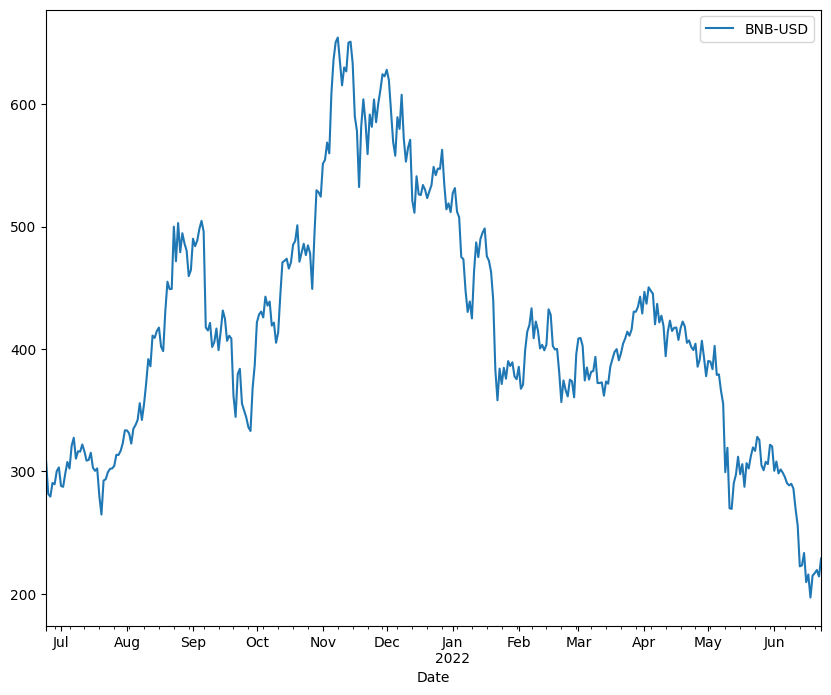

In [8]:
adj_close.plot(figsize=(10, 8), subplots=True)       #Plotting the Close Column of the data

In [12]:
bnb_data = pd.DataFrame(adj_close.dropna()) #Put Close in the data frame after removing null data
bnb_data.tail() # Read last 5 rows of adj_close data

Ticker,BNB-USD
Date,
2022-06-19,214.920532
2022-06-20,216.934265
2022-06-21,219.498627
2022-06-22,214.261917
2022-06-23,228.953751


Descriptive statistics for adjacent close price

In [14]:
bnb_data.describe().round(2) # Descriptive Statistics for Adjacent close price

Ticker,BNB-USD
count,365.00
mean,415.40
std,98.60
min,197.04
25%,342.06
50%,406.72
75%,478.03
max,654.32


## Returns and volatility


In [16]:
bnb_adj_close = pd.DataFrame(adj_close.dropna())

### Normal Daily  Return
Simple normal return is just the percentage changes of returns.The following code derives the percentage returns  

In [33]:
normal_return = bnb_adj_close.pct_change()
normal_return.head()

Ticker,BNB-USD
Date,
2021-06-24,NaN
2021-06-25,-0.086824
2021-06-26,-0.007751
2021-06-27,0.039826
2021-06-28,-0.003555


### Annualized normal return and annualized volatility

In [32]:
dfnr = normal_return.copy(deep=True)
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annualized normal return is 0.02423948 and its annualized volatility is 0.79898322


### Daily  Log Return
Log return will be used in option pricing as it help us to measure in the comparable metrics.

In [34]:
log_rets = np.log(bnb_adj_close / bnb_adj_close.shift(1))
log_rets.head().round(4)

Ticker,BNB-USD
Date,
2021-06-24,NaN
2021-06-25,-0.0908
2021-06-26,-0.0078
2021-06-27,0.0391
2021-06-28,-0.0036


### Annualized Log return and annualized Volatility

In [36]:
dflr = pd.DataFrame(log_rets, columns = ['BNB-USD'])
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f ' % (lr,lv))

The annualized log return is -0.29868632 and its annualized volatility is 0.80804295 


### Movement of log volatility

Text(0.5, 1.0, 'Log Return')

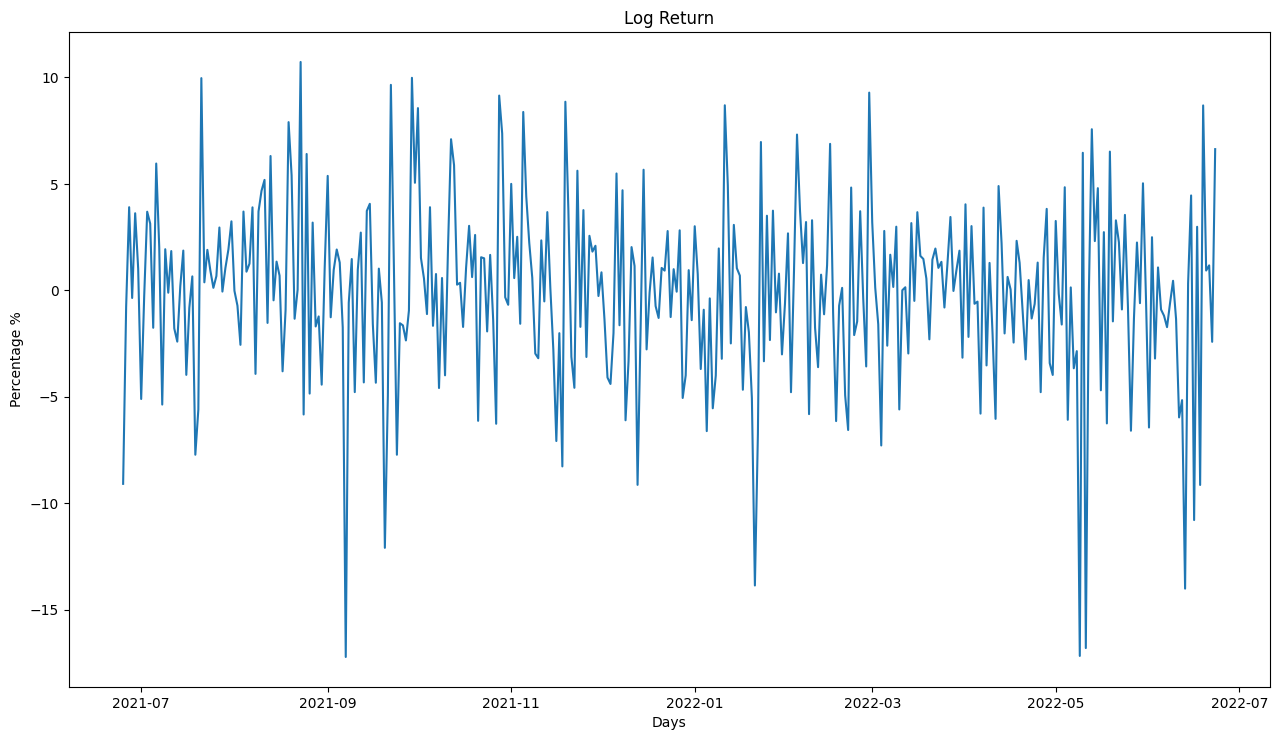

In [37]:
fig = plt.figure()
fig.set_size_inches(15.5, 8.5, forward=True)
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage %')
plt.title('Log Return')

Text(0.5, 1.0, 'BNB-USD Average annualized volatility:BNB-USD    80.8\ndtype: float64%')

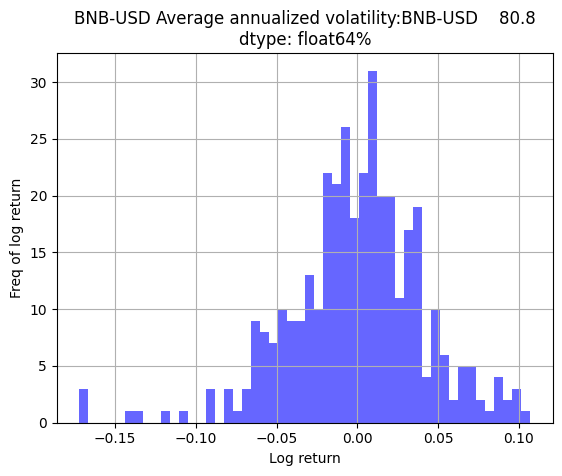

In [38]:
str_vol = str(round(lv, 4)*100)
fig, ax = plt.subplots()
dflr['BNB-USD'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('BNB-USD Average annualized volatility:'+ str_vol + '%')

# Part Two

Binary put option pricing using the Black-Scholes, Monte Carlo Simulation and Binomial Tree Models

## Binomial Tree (CRR Tree)

### Data Input
Binomial Tree pricing method is discrete model. Valuation is performed iteratively, starting at each of the final nodes, and then working backwards through the tree towards the first node (valuation date). The value computed at each stage is the value of the option at that point in time.

In [39]:
# confirm data used for this part, spot price, volatility
# confirm explanations in markdown cells
# confirm dates and details in comments
# change time to expiry, confirm whether options should last long or not
# use reasonable N
# get risk free rate from bloomberg

In [40]:
S0 = 228.953751       # spot stock price (Close price of BNB-USD on 23rd Jun'22)
K = 240
T = 1/365             # Time to maturity  is set as 1 day
r = 0.0305            # Risk free rate 1 year bond as dated on 26,Mar'22
sig = 0.8094          # annualized log volatility
N = 6                 # Number of time steps
payoff = "put"        # the option type

### Step 1: Create the binomial price tree.

At each step, it is assumed that the underlying instrument will move up or down by a specific factor ( u or d) per step of the tree (where, by definition, u ≥ 1 and 0 < d ≤ 1 ). So, if S is the current price, then in the next period the price will either be S_up = Su or S_down = Sd.

In [41]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor
print ('Crypto Price movement UP factor %s and DOWN factor %s ' %(u,d))

Crypto Price movement UP factor 1.017446258187033 and DOWN factor 0.9828528946402338 


In [42]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [43]:
S

array([[228.953751  , 232.94813725, 237.0122106 , 241.14718682,
        245.3543029 , 249.63481742, 253.99001089],
       [  0.        , 225.02785691, 228.953751  , 232.94813725,
        237.0122106 , 241.14718682, 245.3543029 ],
       [  0.        ,   0.        , 221.16928054, 225.02785691,
        228.953751  , 232.94813725, 237.0122106 ],
       [  0.        ,   0.        ,   0.        , 217.37686758,
        221.16928054, 225.02785691, 228.953751  ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        213.64948353, 217.37686758, 221.16928054],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 209.98601333, 213.64948353],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 206.38536103]])

Probability for price moving up or down

In [44]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability

In [45]:
print('Probalilty for moving  up : ', p)
print('Probalilty for moving  down : ', q)

Probalilty for moving  up :  0.49607874568686333
Probalilty for moving  down :  0.5039212543131366


In [46]:
print('Upward movement factor : ', u)
print('Downward movement factor : ', d)

Upward movement factor :  1.017446258187033
Downward movement factor :  0.9828528946402338


### Step 2: Find option value at each final node.

At each final node of the tree-i.e. at expiration of the option, the option value is simply its intrinsic, or exercise, value: H[(K-S_n),0] for a put option, where K is the strike price and S_n is the spot price of the underlying asset at the n-th period.

In [47]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.heaviside(K - S_T, 0.5)

In [48]:
V

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

### Step 3: Find option value at earlier nodes.

Once the above step is complete, the option value is then found for each node, starting at the penultimate time step, and working back to the first node of the tree (the valuation date) where the calculated result is the value of the option.

In [49]:
# for binary Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.89418336, 0.81730621, 0.69332007, 0.50586063, 0.25392956,
        0.        , 0.        ],
       [0.        , 0.96988878, 0.93938535, 0.87788126, 0.75388488,
        0.50391424, 0.        ],
       [0.        , 0.        , 0.99994429, 0.99995822, 0.99997215,
        0.99998607, 1.        ],
       [0.        , 0.        , 0.        , 0.99995822, 0.99997215,
        0.99998607, 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.99997215,
        0.99998607, 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.99998607, 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ]])

In [50]:
print('binary ' + payoff, str( V[0,0]))

binary put 0.8941833593168196


## Monte Carlo Simulation

In [51]:
def mcs_bin_simulation(S0, K, T, r, sigma, payoff='put', p=100, s=10000):
    M=p
    I=s
    dt = T/M
    S = np.zeros((M+1, I))
    S[0] = S0
    # distribution term with zero mean
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M + 1):
        # generate price sequence
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t])
    p = np.mean(np.heaviside(K - S[-1], 0.5))
    return p, S


Underlying asset price is calculated using 100 time steps and 10,000 simulations

In [52]:
MCS_bp, S = mcs_bin_simulation(228.953751, 240, 1/365, 0.0305, 0.8094)
print('Binary put option price using MCS is $',MCS_bp)

Binary put option price using MCS is $ 0.8783


Text(0, 0.5, 'Frequency')

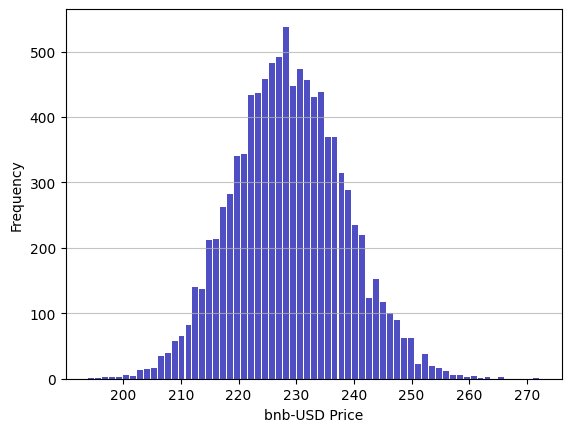

In [53]:

n, bins, patches = plt.hist(x=S[-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
#
plt.grid(axis='y', alpha=0.75)
plt.xlabel('bnb-USD Price')
plt.ylabel('Frequency')

## Black Scholes Model

In [54]:
def bin_option_bs(S, K, T, r, vol, payoff):

    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put

    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)

    return option_value

In [55]:
bsp = bin_option_bs(228.953751, 240, 1/365, 0.0305, 0.8094, "put")
print('Binary put option price using BSM is $', bsp)

Binary put option price using BSM is $ 0.8709836295469146


In [56]:
S = np.linspace(160,300,45)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = bin_option_bs(S[i], 240, 1/365, 0.0305, 0.8094, "put")

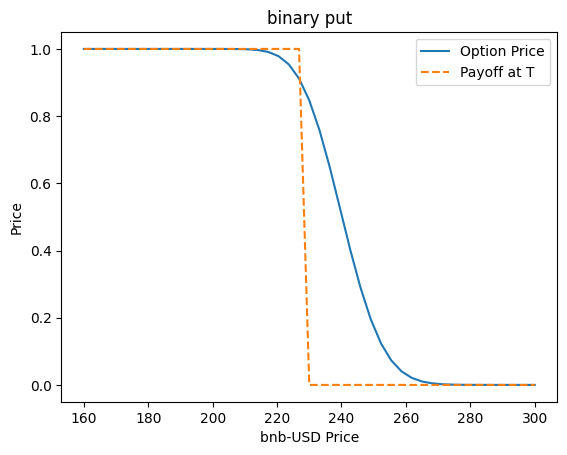

In [57]:
fig = plt.figure()
plt.plot(S, cp, '-')

plt.plot(S, np.heaviside(228.953751 - S, 0.5), '--')
plt.xlabel('bnb-USD Price')
plt.ylabel('Price')
plt.title('binary put')
plt.legend(['Option Price','Payoff at T'])

## The average binary put price (bnb-USD)

In [58]:
print(' Binomial price tree method - Eurpoean put price for bnb-USD wiht 1 week expiry  ' , str( V[0,0].round(4)))
print(' Monte Carlo Simulation method -Eurpoean put price for bnb-USD with 1 week expiry  ', str(MCS_bp.round(4)))
print(' BSM method - Eurpoean put price for bnb-USD with 1 week expiry  ', bsp.round(4))

 Binomial price tree method - Eurpoean put price for bnb-USD wiht 1 week expiry   0.8942
 Monte Carlo Simulation method -Eurpoean put price for bnb-USD with 1 week expiry   0.8783
 BSM method - Eurpoean put price for bnb-USD with 1 week expiry   0.871


In [59]:
Put_prices=( float( V[0,0].round(4)),(MCS_bp.round(4)),bsp)
Put_price1 = pd.DataFrame (Put_prices)

In [60]:
Put_price1['Method'] = ('Binomial price tree ', 'Monte Carlo Simulation method', 'Black Scholes Model')
Put_price1.columns = ['Price','Method' ]
Put_price1

,Price,Method
0,0.894200,Binomial price tree
1,0.878300,Monte Carlo Simulation method
2,0.870984,Black Scholes Model


In [61]:
Price_mean= Put_price1['Price'].mean()
print ('The combined binary put price for bnb-USD is $', Price_mean)

The combined binary put price for bnb-USD is $ 0.8811612098489715


# Course work Part 3

## Greeks for risk assessment

Greeks helps trader to better understand the risk and possible rewards associated with a option. the knowledge of greeks also aid a portfolio manager in hedging a portfolio against uncertain movements in the underlying price

In [62]:
# confirm greeks formula
# confirm option value change direction

In [63]:
S0 = 228.953751       # spot stock price (Close price of BNB-USD on 23rd Jun'22)
K = 240
T = 1/365             # Time to maturity  is set as 2 hours
r = 0.0305            # Risk free rate 1 year bond as dated on 26,Mar'22
sig = 0.8094          # annualized log volatility
N = 6                 # Number of time steps
payoff = "put"

### Delta
Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [64]:
def delta(S, K, T, r, q, vol, payoff):
    # q: interest rate
    # r: risk-free rate
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    if payoff == "call":
        delta =  np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/(vol*S*np.sqrt(T))
    elif payoff == "put":
        # the binary put delta has a negative sign to the binary call delta
        # according to Paul Wilmott introduces Quantitative Finance 2nd edition
        delta =  np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/(vol*S*np.sqrt(T))

    return delta


In [65]:
d = delta(228.953751, 240, 1/365, 0.0305, 0, 0.8094, "put")
print('The value of Delta is', d.round(4),'.','If the stock price increases by $1, then the value of the option will increase by $', abs(d).round(4))

The value of Delta is 0.0217 . If the stock price increases by $1, then the value of the option will increase by $ 0.0217


In [66]:
S = np.linspace(180,280,35)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 240, 1/365, 0.0305, 0, 0.8094, "put")

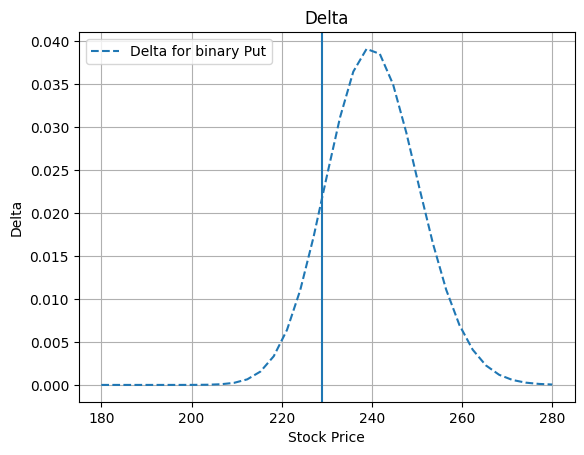

In [67]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.axvline(228.953751)
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for binary Put'])

In [68]:
S = np.linspace(160, 280, 25)
T = np.linspace(0.001, 0.03, 25)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 240,T[i], 0.0305, 0, 0.8094, "put")

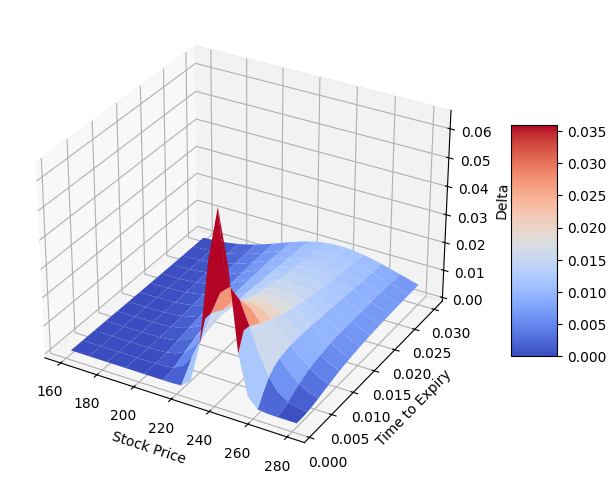

In [69]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Gamma
Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [70]:
def gamma(S, K, T, r, q, vol):

    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)

    #denominator T term has no sqrt in paul wilmott introduces quanntitative finance
    # but the sqrt has little effect on the shape of the gamma

    gamma = np.exp(- r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0) / ( np.sqrt(T) * (vol * S)**2)

    return gamma

In [71]:
g = gamma(228.953751, 240, 1/365, 0.0305, 0, 0.8094)
print('The value of Gamma is', g.round(6),'.','If the stock price increase $1, then the value of the delta will decrease by', abs(g).round(4))

The value of Gamma is -0.000127 . If the stock price increase $1, then the value of the delta will decrease by 0.0001


In [72]:
S = np.linspace(180,300,35)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 240,1/365, 0.0305,0, 0.8094)

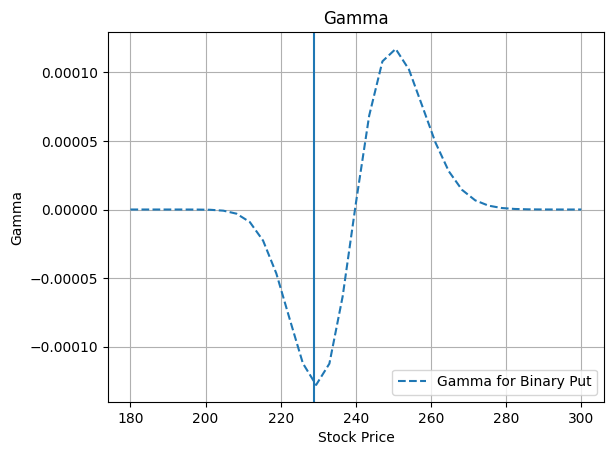

In [73]:
fig = plt.figure()
plt.plot(S, Gamma, '--')
plt.grid()
plt.axvline(228.953751)
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Binary Put'])

In [74]:
S = np.linspace(160, 320, 35)
T = np.linspace(0.001, 0.03, 45)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 240,T[i], 0.0305,0, 0.8094)

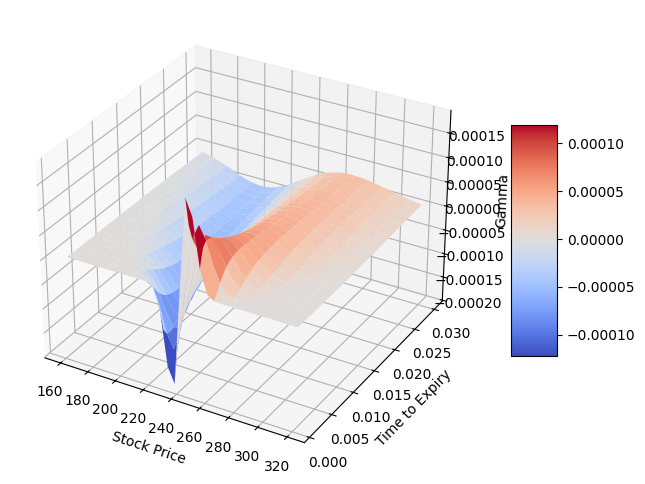

In [75]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Speed
Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [76]:
def speed(S, K, T, r, q, vol, payoff):

    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)

    # reordered the quotient for simplicity
    # paul wilmott introduces quantitative finance has no sqrt for the T quotient term (already removed)
    speed = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (-2*d1 + (1 - d1*d2)/(vol * np.sqrt(T))) / ((vol **2) * (S**3) * T)

    return speed

In [77]:
s = speed(228.953751, 240, 1/365, 0.0305, 0, 0.8094, "put")

print('The value of Speed is', s.round(6),'.','If the stock price increase $1, then the value of the gamma will decrease by', abs(s).round(6))

The value of Speed is -3.2e-05 . If the stock price increase $1, then the value of the gamma will decrease by 3.2e-05


In [78]:
S = np.linspace(180,300,35)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i],245,1/365, 0.0305, 0, 0.8094, "put")

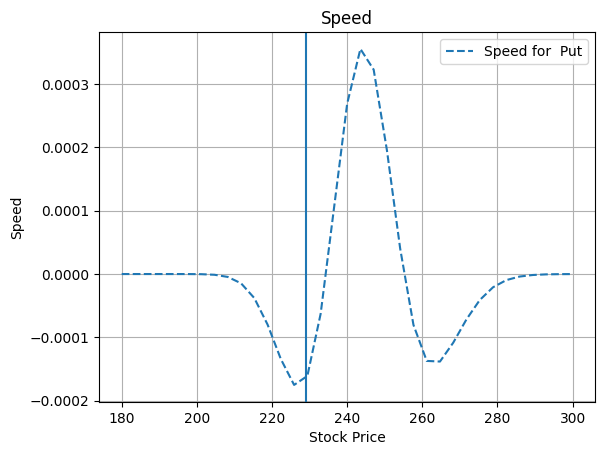

In [79]:
fig = plt.figure()
plt.plot(S, Speed, '--')
plt.grid()
plt.axvline(228.953751)
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for  Put'])

In [80]:
S = np.linspace(180, 300, 35)
T = np.linspace(0.001, 0.03, 45)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j],240,T[i],0.0305,0, 0.8094, "put")

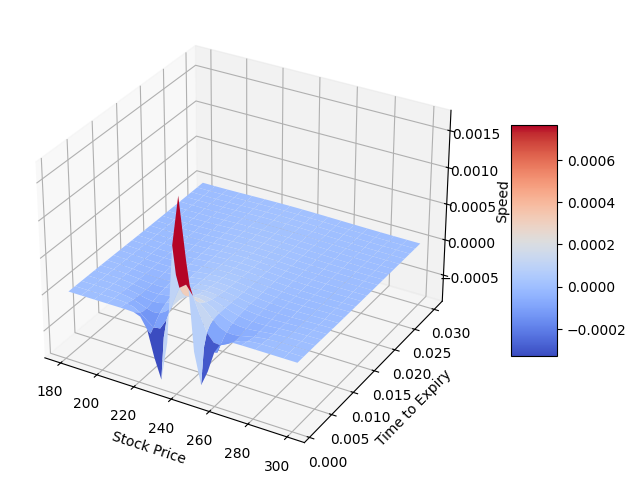

In [81]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Theta
Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [82]:
def theta(S, K, T, r, q, vol, payoff):

    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = r*np.exp(-r*T)*si.norm.cdf(d2) + np.exp(-r*T)*si.norm.pdf(d2)*(d1/2*T - (r-q)/vol*np.sqrt(T))
    elif payoff == "put":
        theta = r * np.exp(-r*T)*(1 - si.norm.cdf(d2)) - np.exp(-r*T)*si.norm.pdf(d2)*(d1/(2*T) - (r-q)/(vol*np.sqrt(T)))
    return theta

In [83]:
t = theta(228.953751, 240,1/365, 0.0305, 0, 0.8094, "put")
t_1 = t/365
print('Annualized Theta value is ', t.round(4), 'and Theta value for 1 day before maturity is ', t_1.round(4))

Annualized Theta value is  41.9818 and Theta value for 1 day before maturity is  0.115


In [84]:
print('At time 1 day  before maturity, option value decrease by ', t_1.round(4))

At time 1 day  before maturity, option value decrease by  0.115


In [85]:
T = np.linspace(0.001,0.04,20)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(228.953751, 240, T[i], 0.0305, 0,1.2172, 'put')

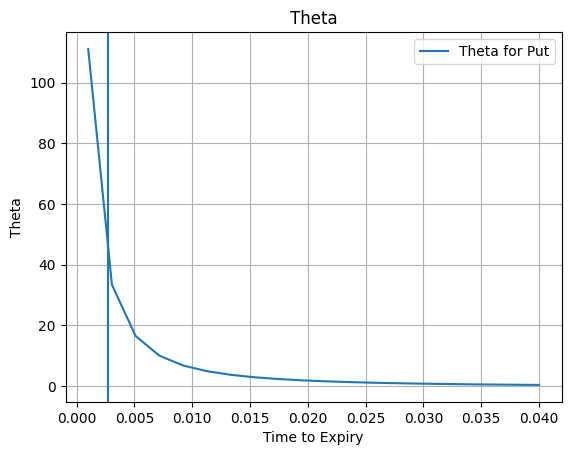

In [86]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.axvline(1/365)
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend([ 'Theta for Put'])

In [87]:
S = np.linspace(160, 300, 25)
T = np.linspace(0.001, 0.03, 45)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j],240, T[i],0.0305, 0, 0.8094, 'put')

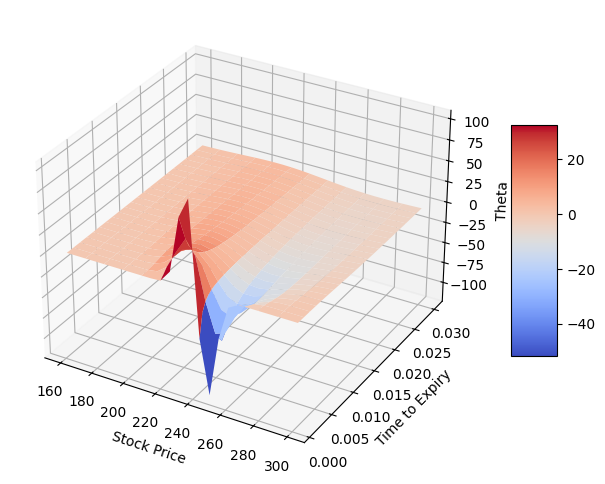

In [88]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Rho
Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [89]:
def rho(S, K, T, r, q, vol, payoff):

    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho = - T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + (np.sqrt(T)/vol)*np.exp(-r*T)*si.norm.pdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - T * np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) - (np.sqrt(T)/vol)*np.exp(-r*T)*si.norm.pdf(d2, 0.0, 1.0)

    return rho

In [90]:
r = rho(228.953751, 240, 1/365, 0.0305, 0, 0.8094, "put")
print('The value of Rho is', r.round(4),'.','If the interest rate increase by 1%, then the value of the put option will decrease by $', abs(r).round(4))

The value of Rho is -0.016 . If the interest rate increase by 1%, then the value of the put option will decrease by $ 0.016


In [91]:
r = np.linspace(0,0.07,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(228.953751, 240, 1/365, r[i], 0, 0.8094, 'put')

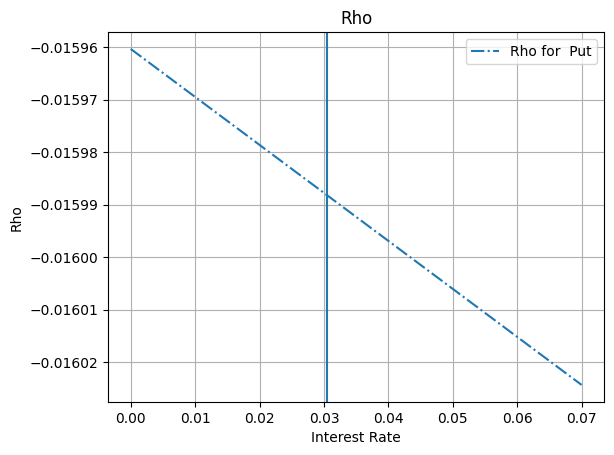

In [92]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-.')
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.grid()
plt.axvline(0.0305)
plt.title('Rho')
plt.legend(['Rho for  Put'])


In [93]:
S = np.linspace(180, 300, 35)
R = np.linspace(0,0.07,30)
Rho = np.zeros((len(R),len(S)))
for j in range(len(S)):
    for i in range(len(R)):
        Rho[i,j] = rho(S[j], 240.0, 1/365, R[i], 0, 0.8094, 'put')

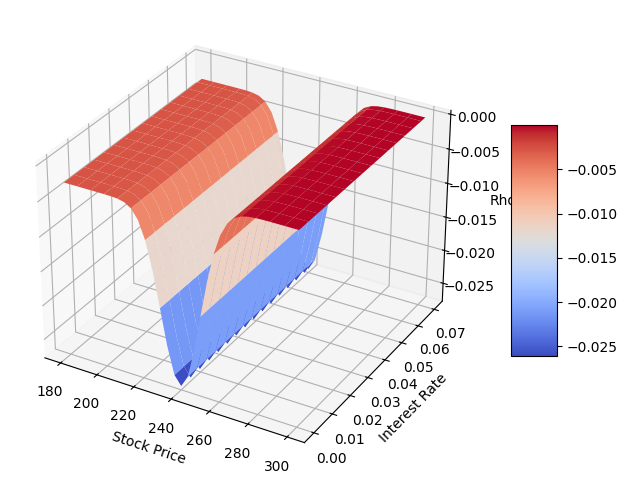

In [94]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,R = np.meshgrid(S,R)
surf = ax.plot_surface(S,R, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Interest Rate')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);


### Vega
Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [95]:
def vega(S, K, T, r, q, vol, payoff):

    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    vega = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * d1/vol

    return vega

In [96]:
v = vega(228.953751, 240, 1/365, 0.0305, 0, 0.8094, "put")
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will decrease $', v.round(4)*0.01)

The value of Vega is -0.283 . If the volatility increases 1%, then the value of the option will decrease $ -0.0028299999999999996


In [97]:
vol = np.linspace(0.1, 10, 25)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(228.953751, 240.0, 1/365, 0.0305,0, vol[i], 'put')

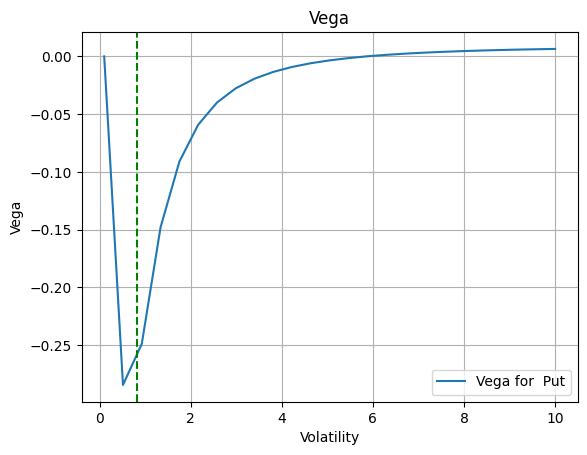

In [98]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.axvline(0.8094, linestyle='--', color='green')
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for  Put'])

In [99]:
# also plot optin value wrt volatillity

In [100]:
vol = np.linspace(0.1, 10, 25)
premium = np.zeros((len(vol),1))
for i in range(len(vol)):
    premium [i] = bin_option_bs(228.953751, 240.0, 1/365, 0.0305, vol[i], 'put')

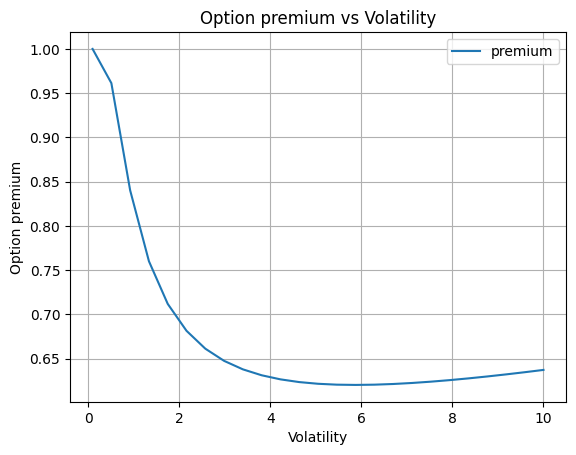

In [101]:
fig = plt.figure()
plt.plot(vol, premium, '-')
plt.grid()
#plt.axvline(0.8094, linestyle='--', color='green')
plt.xlabel('Volatility')
plt.ylabel('Option premium')
plt.title('Option premium vs Volatility')
plt.legend(['premium'])

In [102]:

S = np.linspace(180, 300, 35)
V =  np.linspace(0.1,10,35)
Vega = np.zeros((len(V),len(S)))
for j in range(len(S)):
    for i in range(len(V)):
        Vega[j,i] = vega(S[j] ,240, 1/365, 0.0305,0, V[i], 'put')

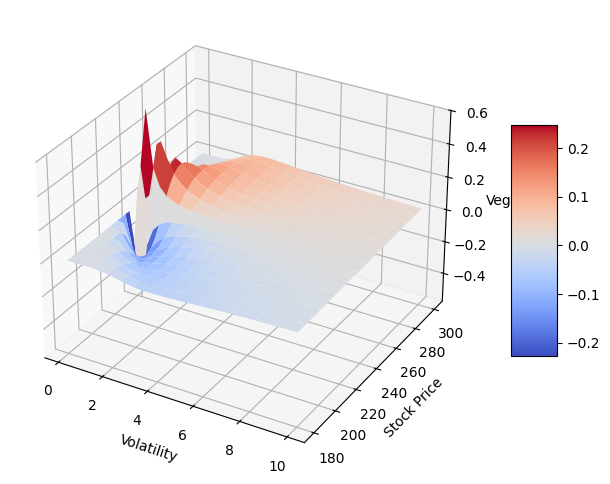

In [103]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
V, S = np.meshgrid(V, S)
surf = ax.plot_surface(V, S, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_ylabel('Stock Price')
ax.set_xlabel('Volatility')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);